<a href="https://colab.research.google.com/github/jdasam/mas1004/blob/2024/live_coding/2_function_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation
- Function takes an input, and gives an output
  - $f(x) = y$
- Everything in the word can be regarded as a function
- And Neural Network can approximate many functions

## A. Regression with One Variable
- Regression:
  - Process of training a model to predict a **continuous** numerical output based on one or more input features.
  - e.g.: Predicts the child's height based on the parent's height.
  - Why is it named "regression"?:
    - The term was first used by Sir Francis Galton, a British statistician and cousin of Charles Darwin, in the late 19th century. Galton was studying the relationship between heights of parents and their children. He observed that although tall parents often had tall children, the children's heights tended to "regress" towards the average or mean height of the population. Similarly, children of short parents were often short but their heights still regressed towards the average.

- What is the difference between continuous and discrete?
  - In continuous value, you always can havee a middle point between to given points
    - For example, if we have 1.0 and 2.0, there exists their middle point 1.5
    - 2.0 is twice larger than 1.0
  - On the other hand, discrete value does not have middle point
    - Even if we have student number 20250001, 20250002, there won't be 20250001.5
    - 20250001 and 20250002 has no meaning of size or magnitude

- Let's make function that works as f(x) = ax+b
    -  In this cell, we will create a function that follows the linear equation format f(x) = ax + b. This function will take an input x and return value that is the result of the equation. The variables a and b are coefficients that we will define. The variable a is the slope of the line and b is the y-intercept. This function will help us understand the concept of function approximation in the context of regression.


In [2]:
# Let's make function that works as f(x) = ax+b

param_a = 1.7
param_b = -2.3

def my_function(x): # hidden function that we have to guess
  return param_a * x + param_b

my_function(1.0)

-0.5999999999999999

In [10]:
# Let's plot this function
# First, let's make many x candidates
# from -5 to 5, with 500 total x

xs = [ i for i in range(501)]
xs # This gives list of integers 0 to 500
xs = [ (i-250)/50 for i in range(501)]
xs

[-5.0,
 -4.98,
 -4.96,
 -4.94,
 -4.92,
 -4.9,
 -4.88,
 -4.86,
 -4.84,
 -4.82,
 -4.8,
 -4.78,
 -4.76,
 -4.74,
 -4.72,
 -4.7,
 -4.68,
 -4.66,
 -4.64,
 -4.62,
 -4.6,
 -4.58,
 -4.56,
 -4.54,
 -4.52,
 -4.5,
 -4.48,
 -4.46,
 -4.44,
 -4.42,
 -4.4,
 -4.38,
 -4.36,
 -4.34,
 -4.32,
 -4.3,
 -4.28,
 -4.26,
 -4.24,
 -4.22,
 -4.2,
 -4.18,
 -4.16,
 -4.14,
 -4.12,
 -4.1,
 -4.08,
 -4.06,
 -4.04,
 -4.02,
 -4.0,
 -3.98,
 -3.96,
 -3.94,
 -3.92,
 -3.9,
 -3.88,
 -3.86,
 -3.84,
 -3.82,
 -3.8,
 -3.78,
 -3.76,
 -3.74,
 -3.72,
 -3.7,
 -3.68,
 -3.66,
 -3.64,
 -3.62,
 -3.6,
 -3.58,
 -3.56,
 -3.54,
 -3.52,
 -3.5,
 -3.48,
 -3.46,
 -3.44,
 -3.42,
 -3.4,
 -3.38,
 -3.36,
 -3.34,
 -3.32,
 -3.3,
 -3.28,
 -3.26,
 -3.24,
 -3.22,
 -3.2,
 -3.18,
 -3.16,
 -3.14,
 -3.12,
 -3.1,
 -3.08,
 -3.06,
 -3.04,
 -3.02,
 -3.0,
 -2.98,
 -2.96,
 -2.94,
 -2.92,
 -2.9,
 -2.88,
 -2.86,
 -2.84,
 -2.82,
 -2.8,
 -2.78,
 -2.76,
 -2.74,
 -2.72,
 -2.7,
 -2.68,
 -2.66,
 -2.64,
 -2.62,
 -2.6,
 -2.58,
 -2.56,
 -2.54,
 -2.52,
 -2.5,
 -2.48,
 -2.46,
 -

In [14]:
# Now, let's make y
# y = f(x)

# Using for loop
ys = []
for x in xs:
  y = my_function(x)
  ys.append(y)
# Using list comprehension
ys = [my_function(x) for x in xs]

In [17]:
# Check the length of xs and ys are equal
# The item of xs and ys are 1:1 mapping
len(xs), len(ys)

(501, 501)

In [18]:
# We can check that i-th value of xs and ys are 1:1 mapping
idx = 57
xs[idx], ys[idx], my_function(xs[idx]) # ys[idx] has to be equal to my_function(xs[idx])`

(-3.86, -8.861999999999998, -8.861999999999998)

In [19]:
# Let's plot this function
for x, y in zip(xs, ys):
  print(x, y) # now each data sample has (x, y) value, and we have 501 data samples



-5.0 -10.8
-4.98 -10.766000000000002
-4.96 -10.732
-4.94 -10.698
-4.92 -10.663999999999998
-4.9 -10.629999999999999
-4.88 -10.596
-4.86 -10.562000000000001
-4.84 -10.527999999999999
-4.82 -10.494
-4.8 -10.46
-4.78 -10.425999999999998
-4.76 -10.392
-4.74 -10.358
-4.72 -10.323999999999998
-4.7 -10.29
-4.68 -10.256
-4.66 -10.222
-4.64 -10.187999999999999
-4.62 -10.154
-4.6 -10.12
-4.58 -10.085999999999999
-4.56 -10.052
-4.54 -10.018
-4.52 -9.983999999999998
-4.5 -9.95
-4.48 -9.916
-4.46 -9.882
-4.44 -9.847999999999999
-4.42 -9.814
-4.4 -9.780000000000001
-4.38 -9.745999999999999
-4.36 -9.712
-4.34 -9.677999999999999
-4.32 -9.644
-4.3 -9.61
-4.28 -9.576
-4.26 -9.541999999999998
-4.24 -9.508
-4.22 -9.474
-4.2 -9.44
-4.18 -9.405999999999999
-4.16 -9.372
-4.14 -9.338
-4.12 -9.303999999999998
-4.1 -9.27
-4.08 -9.236
-4.06 -9.201999999999998
-4.04 -9.168
-4.02 -9.133999999999999
-4.0 -9.1
-3.98 -9.065999999999999
-3.96 -9.032
-3.94 -8.998
-3.92 -8.963999999999999
-3.9 -8.93
-3.88 -8.896
-3.86 -

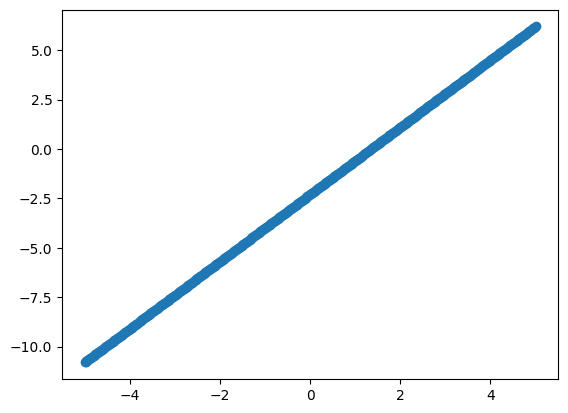

In [22]:
# To plot arbitrary number of data points on 2D space, we can use scatter
import matplotlib.pyplot as plt

plt.scatter(xs, ys)

# How can we draw ony 1 sample for every 10 samples instead of drawing every samples?
# plt.scatter(xs[::10], ys[::10]) # begin:end:step
# in python slice indexing, you can ommit initial slice if you are selecting it from very first
# and also end slice if you are selecting until the very last one


In [39]:
# Let's add some noise
# adding random noise
import random
# random.random() # this provide a random value between 0 and 1
# if you want to get random value bewtween -1 to 1
# noise = (random.random() - 0.5) * 2

ys = [my_function(x) + (random.random() - 0.5) * 2  for x in xs]


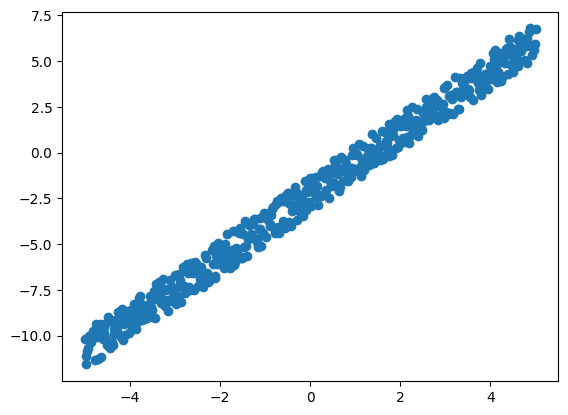

In [40]:
# plot again
plt.scatter(xs, ys)

##### (Extra) Short Explanation about Random Number Generator
- Random number generator is a function that generates a sequence of numbers that seem to occur in random order.

In [59]:
# random is not actually complete random
# usually computers uses pseudo-random

# random.random() in fact has its destiny. It will always return same value
# if the seed is the same

random.seed(0)
[random.random() for _ in range(10)]

# No matter how many times you run this code, it will always return same value

[0.8444218515250481,
 0.7579544029403025,
 0.420571580830845,
 0.25891675029296335,
 0.5112747213686085,
 0.4049341374504143,
 0.7837985890347726,
 0.30331272607892745,
 0.4765969541523558,
 0.5833820394550312]

### 1) Guess Regression manually
- Since we know the function f(x) = ax + b, we can guess the value of a and b.
- If we select correct a and b, the line will be the best fit line for the data.
    - What machine learning does is to find the best a and b automatically.
    - But here, we will find the best a and b manually, so that we can understand the concept of machine learning better.

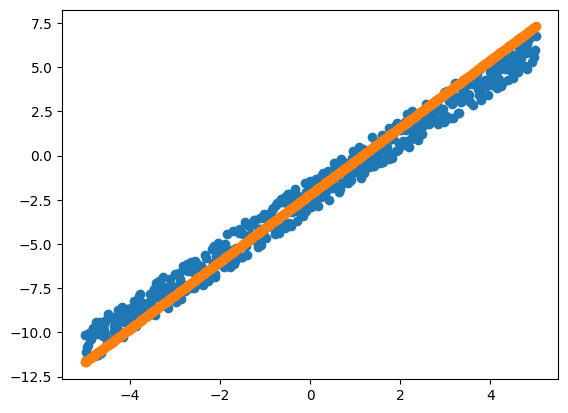

In [70]:
# Let's suppose we try guessing a and b manually

est_a = 1.9
est_b = -2.2

def my_estimation(x):
  return est_a * x + est_b

est_ys = [my_estimation(x) for x in xs]

plt.scatter(xs, ys) # coloured with blue
plt.scatter(xs, est_ys) # coloured with orange

#### 1-1) Calculating Error
- How can we calculates how good or bad our estimation is?
    - We can calculate the error between the actual value and the predicted value.
        - There are many ways to calculate the error.
            - For example, we can calculate the absolute value of the difference between the actual value and the predicted value.
              - $y-\hat{y}$
            - Or we can calculate the square of the difference between the actual value and the predicted value.
              - $(y-\hat{y})^2$
    - We call this error value as **loss**.
        - Sometimes, we call this error as **cost**.
    - The function that calculates the loss is called **loss function**.
        - Sometimes, we call this loss function as **cost function** or **objective function**.

In [74]:
def cal_error(pred, target):
  return abs(pred-target)

errors = []
for y, est_y in zip(ys, est_ys):
  errors.append(cal_error(est_y, y))
errors = [cal_error(est_y, y) for y, est_y in zip(ys, est_ys)]
sum(errors) / len(errors) # mean of the errors

0.6992485835428447

In [ ]:
# compare every value in y_noise and estimation
# we have to compare values in the same idx


In [84]:
# change a and b to get better estimation

est_a = 1.75
est_b = -2.35

est_ys = [my_estimation(x) for x in xs]

errors = []
for y, est_y in zip(ys, est_ys):
  errors.append(cal_error(est_y, y))
errors = [cal_error(est_y, y) for y, est_y in zip(ys, est_ys)]
sum(errors) / len(errors) # mean of the errors

0.5221249219546209

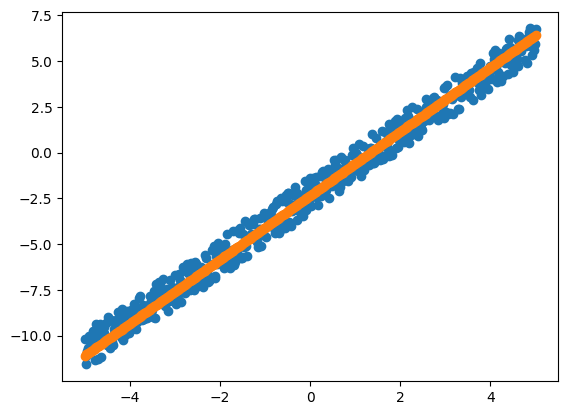

In [85]:
plt.scatter(xs, ys) # coloured with blue
plt.scatter(xs, est_ys) # coloured with orange

#### (Extra) calculate gradient
- How can we calculate the slope (gradient) of each parameter?
  - We can calculate the gradient of the loss function with respect to each parameter.
  - One brutal way to calculate the gradient is to calculate the loss function for each parameter and see how the loss function changes when we change the parameter a little bit.

##### (Extra) Naming Convention
- CamelCase
  - uses upper letter to distinguish words
    - MyModelFunction
    - myModelFunction
  - In Python, only used for Class names
- snake_case
  - uses underbar
    - my_model_function

### 2. Using Artificial Neural Network

#### 2-1) Define the function
- We want to design more complex function that is not linear.
    - And we will try approximating the function using neural network.

- To do this, we will practice with ``class``
    - ``class`` is a template for creating objects.
        - It has attributes and methods.
            - Attributes are variables that store data.
            - Methods are functions that are defined inside the class.
        - We can create an object from a class.
            - We call this process as **instantiation**.
            - The object that is created from a class is called **instance**.
        - We can access the attributes and methods of an object using dot notation.
            - ``object.attribute``
            - ``object.method()``
        - We can define a class using ``class`` keyword.
            - ``class ClassName:``
        - We can define a method using ``def`` keyword.
            - ``def method_name(self, arguments):``
            - Every method should have ``self`` as the first argument.
                - ``self`` is a reference to the current instance of the class.
                - We can access the attributes and methods of the class using ``self``.
                - ``self`` is not a keyword. You can use any word instead of ``self``.
                    - But it is a convention to use ``self``.
            - There are special methods that are defined using double underscore.
                - ``__init__`` is a special method that is called when an instance of a class is created.
                    - We call this process as **instantiation**.
                    - ``class_instance = ClassName(arguments)``
                - ``__call__`` is a special method that is called when an instance of a class is called.
                    - ``class_instance(arguments)``
                

        - We can define an attribute using ``self``.
            - ``self.attribute_name = value``
    



In [8]:
# Let's assume we are making a student object

# for each student, we want to assign Name, ID, Major
student_a = {"Name": 'Dasaem', "ID": 20210001, "Major": "Art & Technology"}
student_b = {"Name": 'Jeong', "ID": 20213249, "Major": "Media & Entertainment"}
student_c = {'name': 'Kim', "id": 20240102, 'major': 'Art & technology'}

# make a function that introduce oneself
def introduce_student(student):
  # Hi, my name is ~~, ID ~~, who majors in ~~~
  # print("Hi, my name is " + student['Name'] + ', ID ' + str(student['ID']) + ' who majors in ' + student['Major'])
  # we can do the same thing with formatted string
  print(f"Hi, my name is {student['Name']}, ID {student['ID']}, who majors in {student['Major']}")
  # print("Hi, my name is {student['Name']}")

introduce_student(student_a)
introduce_student(student_b)
introduce_student(student_c)

Hi, my name is Dasaem, ID 20210001, who majors in Art & Technology
Hi, my name is Jeong, ID 20213249, who majors in Media & Entertainment


KeyError: 'Name'

In [9]:
class Student: # class name has to start with upper case
  # class has attribute and method
  # some method is called special method, whitch starts and ends with __
  def __init__(self, name, id, major): # every method of class takes itself as an input argument

    # we want to assign some data of each variable in this class
    self.name = name
    self.id =  id
    self.major = major

  def introduce(self):
    print(f"Hi, my name is {self.name}, ID {self.id}, who majors in {self.major}")



# student_a = {"Name": 'Dasaem', "ID": 20210001, "Major": "Art & Technology"}
student_a = Student('Dasaem', 20210001, "Art & Technology")
# Student is a class, student_a is an instance of Student

student_b = Student('Jeong', 20213249, 'Media & Entertainment')

student_b.introduce()



Hi, my name is Jeong, ID 20213249, who majors in Media & Entertainment


In [33]:
_ = 'underbar'
_

'underbar'

In [32]:
import random
random.seed(0)
[(random.random()-0.5) * 2 for _ in range(4)]
# we use _ when we don't have to name that variable
# in this case, we don't care which for loop index we are in

[0.6888437030500962, 0.515908805880605, -0.15885683833831, -0.4821664994140733]

In [50]:
# lets make a function that is f(x) = ax^3 + bx^2 + cx + d

class MyFunction:
  def __init__(self, params=None):
    # if user provide params, use that
    # else make randomly selected params
    if params is None:
      self.params = [(random.random()-0.5) * 2 for _ in range(4)]
    else:
      self.params = params
    self.a, self.b, self.c, self.d = self.params

  def __call__(self, x): # this function is called when func_a(x)
    return self.a * x**3 + self.b * x**2 + self.c * x + self.d

  def __len__(self): # this is called with len(func_a)
    return len(self.params)

  def __repr__(self): # this is called when you print(func_a)
    return f"MyFunction object with param {self.params}"

  def return_answer(self, x): # this function is called when func_a.return_answer(x)
    return self.a * x**3 + self.b * x**2 + self.c * x + self.d


func_a = MyFunction([1.7, -3.2, 1.5, 0.3]) # this calls __init__ function of MyFunction
# func_a.params

x= 1.5
func_a(x) # Remember, python always "Calls" a function with ()
# func_a.return_answer(x)

1.0874999999999997

In [22]:
len(func_a)

4

In [52]:
func_b = MyFunction()
func_c = MyFunction()


In [45]:
func_b(x), func_c(x) # each class instance has its own parameters as its attribute

(5.549202449525659, -1.0698703714608677)

In [53]:
print(func_b)

MyFunction object with param [0.43940937280790826, -0.2023529155514625, 0.649689954296466, 0.3363064024637017]


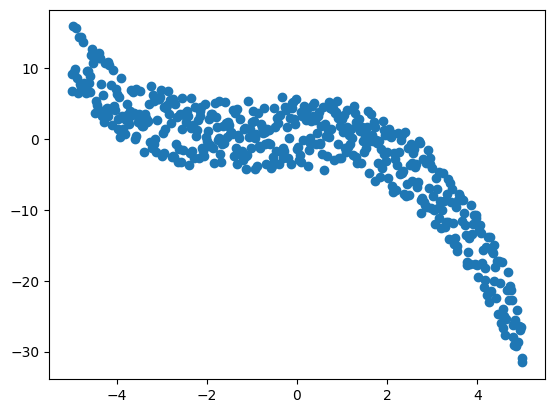

In [62]:
import matplotlib.pyplot as plt
# Let's plot our new function
# random.seed(3)
func_a = MyFunction()
xs = [ (i-250)/50 for i in range(501)]
ys = [func_a(x) +(random.random() -0.5)*10  for x in xs]

plt.scatter(xs, ys)

#### 2-2) Making Artificial Neuron
An artificial neuron is a mathematical function designed to model the behavior of biological neurons. It serves as a fundamental building block of neural networks in machine learning.

##### Basic Components
- Input: Receives various forms of information (or data) that the neural network will learn from.
- Weights: These are parameters that transform input data within the neuron's internal function.
- Bias: An additional parameter to shift the activation function.
- Activation Function: This function processes the incoming information, and depending on its output, the artificial neuron activates or not.

$\text{Output} = \text{Activation Function}(\sum^n_{i=1}(\text{Input}[i] \times \text{Weight}[i]) + \text{Bias})$


#### 2-4) Implementing following digaram in Python
- Ignoring the bias and activation now
![data_ai_figure.jpg](https://github.com/jdasam/mas1004-2023/blob/main/live_coding/data_ai_figure.jpg?raw=true)

#### 2-5) Implementing it as a matrix and layer
- Using ``torch`` library

#### 2-6) Make two layers model for function approximation

#### 2-7) Combination of Linear Operation
- Let's suppose the first layer of the neural network takes 1-dim input and has 4 neurons
    - Each neuron has 1 weight and 1 bias
    - weights = $[w_1, w_2, w_3, w_4]$
    - bias = $[b_1, b_2, b_3, b_4]$
    - for input $x$, the result is
        - $[w_1 x + b_1, w_2 x + b_2, w_3 x + b_3, w_4 x + b_4]$
        - or, we can notate them using $o_n$, so that
            - $o_n = w_n x + b_n$
            - $o_1 = w_1 x + b_1$
- So the second layer takes $[o_1, o_2, o_3, o_4]$ as an input
    - This layer has only one neuron, and it has 4 weights and 1 bias
        - Because the input dimension is 4
    - weights = $[u_1, u_2, u_3, u_4]$
    - bias = $c$
    - output = $u_1 o_1 + u_2 o_2 + u_3 o_3 + u_4 o_4 + c$
        - = $u_1 (w_1 x + b_1) + u_2 (w_2 x + b_2) + u_3 (w_3 x + b_3) + u_4 (w_4 x + b_4) + c$
        - = $ (u_1 w_1 + u_2 w_2 + u_3 w_3 + u_4 w_4) x + (u_1 b_1 + u_2 b_2 + u_3 b_3 + u_4 b_4 + c)$
    - Therefore, if we replace the equation above using new symbol $v, d$,
        - $v = u_1 w_1 + u_2 w_2 + u_3 w_3 + u_4 w_4$
        - $d = u_1 b_1 + u_2 b_2 + u_3 b_3 + u_4 b_4 + c$
        - output = $v x + d$
            - Which is a linear equation
- So, we can say that the combination of linear operations is also a linear operation
    - **If** there is NO non-linear activation function between layers

#### 2-8) Combination of Linear and Non-linear Operations

#### 2-9) Training the model

#### 2-10) Visualizing the result
- Draw how each neuron in the first layer is activated

### Update plot in for loop
```
from IPython import display
import matplotlib.pyplot as plt

for i in range(10):
  plt.plot([i], [i], 'o')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.close()
```